<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_spec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [5]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_spec.csv

--2021-05-20 06:34:06--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_spec.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33802 (33K) [text/plain]
Saving to: ‘data_spec.csv.1’

data_spec.csv.1     100%[===================>]  33.01K  --.-KB/s    in 0.003s  

2021-05-20 06:34:06 (12.9 MB/s) - ‘data_spec.csv.1’ saved [33802/33802]



In [6]:
data_spec = pd.read_csv("data_spec.csv").drop(['E(B-V)'],axis=1)
data_spec

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K
0,1995305,139.882019,138.639824,141.146271,0.031659,0.008288,0.002053,16.452,13.233,12.513
1,2164791,39.964355,39.798297,40.131780,0.007085,0.001855,0.000459,15.201,11.282,10.444
2,2283749,291.795223,285.741630,298.106066,0.085278,0.022324,0.005529,16.976,13.714,12.877
3,2693779,176.657938,175.040483,178.305021,0.047128,0.012337,0.003056,16.698,13.423,12.547
4,2832720,154.108925,152.412044,155.843327,0.048824,0.012781,0.003166,15.732,12.358,11.478
...,...,...,...,...,...,...,...,...,...,...
304,12506640,97.789255,97.397369,98.184250,0.029939,0.007837,0.001941,15.489,12.349,11.586
305,12644136,43.998376,43.918048,44.078993,0.007567,0.001981,0.000491,15.666,11.701,10.858
306,12688403,110.781815,110.022197,111.551806,0.024060,0.006298,0.001560,15.671,12.323,11.465
307,12689068,170.244403,168.738357,171.777088,0.034889,0.009133,0.002262,16.930,13.646,12.807


In [7]:
data_spec['d_hi-d'] = data_spec.d_hi - data_spec.d_est
data_spec['d_lo-d'] = data_spec.d_lo - data_spec.d_est
data_spec['sd'] = (data_spec['d_hi-d'] + data_spec['d_lo-d']) / 2 
data_spec

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,d_hi-d,d_lo-d,sd
0,1995305,139.882019,138.639824,141.146271,0.031659,0.008288,0.002053,16.452,13.233,12.513,1.264252,-1.242195,0.011029
1,2164791,39.964355,39.798297,40.131780,0.007085,0.001855,0.000459,15.201,11.282,10.444,0.167425,-0.166058,0.000683
2,2283749,291.795223,285.741630,298.106066,0.085278,0.022324,0.005529,16.976,13.714,12.877,6.310843,-6.053593,0.128625
3,2693779,176.657938,175.040483,178.305021,0.047128,0.012337,0.003056,16.698,13.423,12.547,1.647083,-1.617456,0.014814
4,2832720,154.108925,152.412044,155.843327,0.048824,0.012781,0.003166,15.732,12.358,11.478,1.734401,-1.696881,0.018760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,12506640,97.789255,97.397369,98.184250,0.029939,0.007837,0.001941,15.489,12.349,11.586,0.394995,-0.391886,0.001555
305,12644136,43.998376,43.918048,44.078993,0.007567,0.001981,0.000491,15.666,11.701,10.858,0.080617,-0.080328,0.000145
306,12688403,110.781815,110.022197,111.551806,0.024060,0.006298,0.001560,15.671,12.323,11.465,0.769991,-0.759618,0.005186
307,12689068,170.244403,168.738357,171.777088,0.034889,0.009133,0.002262,16.930,13.646,12.807,1.532684,-1.506047,0.013319


In [19]:
#GENERATE
data_sample = []
data_sample = pd.DataFrame(data_sample)

#seed(12)
for i in range(309) :
  data_sample[i] = np.random.normal(data_spec.d_est[i] ,data_spec.sd[i], 10**4) 
  
 

In [17]:
data_sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308
0,139.870456,39.964677,291.775472,176.654468,154.092984,125.013291,63.177681,71.378851,26.525831,112.942799,193.041190,59.377415,116.231093,351.411059,200.677067,94.366976,86.438848,104.527263,117.194336,150.808917,76.336993,36.985221,151.117372,239.186241,17.447742,410.630579,175.680484,82.100516,157.527778,227.233968,119.956620,64.278939,119.567265,66.699547,91.446347,117.321531,28.142153,76.937131,45.856780,122.186077,...,106.546244,112.365481,151.248050,82.302900,245.019870,222.614518,177.326356,203.307349,46.156162,226.802986,187.797772,119.828095,64.259724,148.862279,96.862997,257.838255,126.220390,74.668148,46.034889,157.399785,18.331252,224.110414,49.055419,175.177054,151.430655,122.266592,71.117852,79.659700,107.774817,105.886640,171.854899,161.874420,208.890716,187.378981,166.638915,97.789040,43.998287,110.783757,170.259641,240.120187
1,139.894464,39.963495,291.638528,176.670996,154.093063,125.010895,63.178779,71.378619,26.526009,112.930491,192.937801,59.377823,116.233870,351.527832,200.696765,94.366423,86.436391,104.564881,117.201308,150.838583,76.344474,36.985406,151.153365,239.205870,17.447739,409.069030,175.675658,82.103750,157.537980,227.298030,119.961352,64.278483,119.545423,66.696458,91.452242,117.394513,28.142149,76.936264,45.857014,122.178973,...,106.545699,112.366816,151.267510,82.302709,244.971209,222.582484,177.273569,203.312550,46.155198,226.706092,187.695239,119.845150,64.258284,148.876197,96.857283,257.832420,126.223662,74.669323,46.034986,157.391022,18.331326,224.160738,49.055501,175.160682,151.430369,122.271727,71.119915,79.662449,107.773705,105.885879,171.857900,161.883193,209.149862,187.391376,166.636364,97.790480,43.998499,110.785316,170.230465,247.170191
2,139.882455,39.964691,291.758710,176.673084,154.098830,125.005279,63.177325,71.380644,26.526069,112.932477,193.024528,59.377063,116.227763,351.465143,200.719704,94.364210,86.436517,104.587314,117.192058,150.853265,76.337094,36.985295,151.109298,239.258305,17.447689,411.615407,175.693949,82.103657,157.514767,227.280048,119.976913,64.281540,119.569942,66.698758,91.453165,117.373952,28.142146,76.936286,45.857009,122.180874,...,106.545781,112.364167,151.273440,82.301710,244.908696,222.577703,177.338041,203.354602,46.157598,226.687401,187.713494,119.839705,64.260294,148.857987,96.871307,257.826723,126.225848,74.668714,46.034614,157.398238,18.331257,224.102377,49.055490,175.138856,151.444047,122.262747,71.120154,79.660046,107.773845,105.886477,171.840896,161.878017,209.473282,187.394677,166.617267,97.789827,43.998290,110.777632,170.256354,250.368215
3,139.868785,39.964083,291.419332,176.667255,154.105811,125.007767,63.177687,71.386147,26.526026,112.934978,193.137199,59.377352,116.233618,351.534234,200.720901,94.375019,86.438689,104.555837,117.195829,150.839827,76.331081,36.985400,151.179450,239.235297,17.447720,411.235436,175.747629,82.101597,157.519103,227.104899,119.968729,64.277802,119.581625,66.694689,91.449042,117.348960,28.142143,76.936161,45.856703,122.175892,...,106.543468,112.367004,151.284853,82.303025,244.931887,222.605491,177.370335,203.361265,46.156355,226.657242,187.640077,119.794541,64.261534,148.870694,96.875032,257.764413,126.221088,74.668747,46.034907,157.391390,18.331324,224.105174,49.055191,175.144866,151.435405,122.270150,71.120205,79.661035,107.775211,105.885962,171.862690,161.886809,209.290340,187.405172,166.627856,97.788380,43.998421,110.782273,170.235661,249.331797
4,139.869821,39.964554,291.905034,176.685306,154.093456,125.009184,63.178888,71.380804,26.525901,112.942898,192.980634,59.377701,116.232901,351.407913,200.719630,94.362954,86.438164,104.567665,117.196229,150.878097,76.336798,36.985306,151.080264,239.197716,17.447757,413.057608,175.715684,82.10247

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


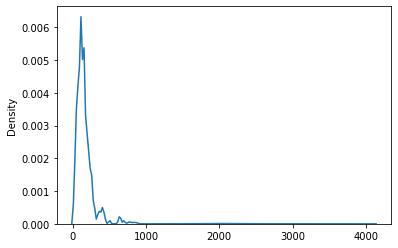

In [20]:
sns.distplot(data_sample , hist=False)

In [21]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(309) :
    M_r[i] = data_spec.r[i] - (5 * (np.log10(data_sample[i])-1)) - data_spec.A_r[i]
    M_J[i] = data_spec.J[i] - (5 * (np.log10(data_sample[i])-1)) - data_spec.A_J[i]
    M_K[i] = data_spec.K[i] - (5 * (np.log10(data_sample[i])-1)) - data_spec.A_K[i]

M()

In [22]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [23]:
print(M_r)
print(M_J)
print(M_K)

          0          1          2     ...       9997       9998       9999
0    10.691668  10.691454  10.691170  ...  10.691628  10.691386  10.691494
1    12.185599  12.185593  12.185537  ...  12.185581  12.185568  12.185542
2     9.566063   9.565175   9.565044  ...   9.563587   9.566672   9.567055
3    10.415219  10.415205  10.414715  ...  10.415038  10.415108  10.415048
4     9.744404   9.743904   9.743692  ...   9.743911   9.744375   9.744421
..         ...        ...        ...  ...        ...        ...        ...
304  10.507645  10.507630  10.507653  ...  10.507574  10.507605  10.507655
305  12.441247  12.441250  12.441250  ...  12.441252  12.441250  12.441245
306  10.424769  10.424526  10.424616  ...  10.424692  10.424588  10.424576
307  10.739291  10.739606  10.739618  ...  10.739882  10.739887  10.739736
308   9.505665   9.498265   9.515776  ...   9.475961   9.473084   9.448785

[309 rows x 10000 columns]
         0         1         2     ...      9997      9998      9999
0  

In [ ]:
M_r.to_csv("M_r_spec.csv")
M_J.to_csv("M_J_spec.csv")
M_K.to_csv("M_K_spec.csv")